
> ⚠️ **Note**: This notebook is currently a work in progress.  
> Some analyses and explanations may still be incomplete or under development.


# Electrical Impedance – Real and Imaginary Parts

This notebook presents the processing and visualization of the real and imaginary components of the electrical impedance in the PySnTeAg sample, based on experimental data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [9]:
data = pd.read_table('PySnTeAg_vid.txt', names=['H', 'F', 'dR', 'dIm', 'Z'])

## Split columns into separate variables

In [10]:
magnetic_field = data['H']
frequency = data['F']
real_part = data['dR']
imag_part = data['dIm']
impedance = data['Z']

## Organize data by frequency

In [11]:
f = frequency[:301]
grouped_data = []
for i in range(301):
    subset = data[data['F'] == f[i]]
    grouped_data.append(subset)

## Define frequency indices and labels

In [12]:
indices = [80, 120, 160, 200, 240]
labels = ['0.8 GHz', '1.2 GHz', '1.6 GHz', '2.0 GHz', '2.4 GHz']

## Plot the real part of impedance

(0.0, 300.0)

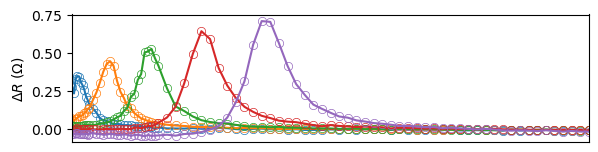

In [13]:
plt.figure(figsize=(6, 3))

for i, idx in enumerate(indices):
    field = grouped_data[idx]['H']
    delta_r = grouped_data[idx]['dR']
    reference = (delta_r.iloc[15] + delta_r.iloc[151]) / 2
    adjusted_r = delta_r - reference

    plt.subplot(2, 1, 1)
    plt.plot(field, adjusted_r, marker='o', markersize=6, markeredgewidth=0.5,
             markerfacecolor='none', label=labels[i])

plt.xticks([])
plt.ylabel(r'$\Delta R$ ($\Omega$)')
plt.tight_layout()
plt.xlim(0, 300)

## Plot the imaginary part of impedance

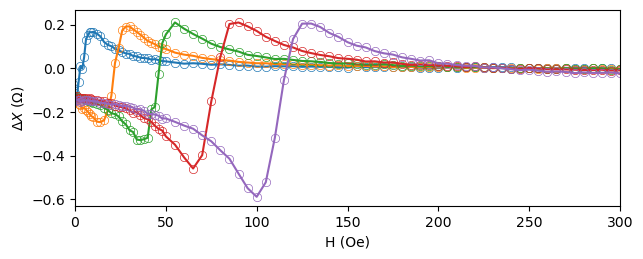

In [14]:
for i, idx in enumerate(indices):
    field = grouped_data[idx]['H']
    delta_x = grouped_data[idx]['dIm']
    reference = (delta_x.iloc[15] + delta_x.iloc[151]) / 2
    adjusted_x = delta_x - reference

    plt.subplot(2, 1, 2)
    plt.plot(field, adjusted_x, marker='o', markersize=6, markeredgewidth=0.5,
             markerfacecolor='none', label=labels[i])

plt.xlabel('H (Oe)')
plt.ylabel(r'$\Delta X$ ($\Omega$)')
plt.tight_layout()
plt.xlim(0, 300)
plt.show()